''' <span style='color:red'>Problem Statement </span> - There are hundreds of years-old historical structures that preserve a country's and community's history for future generations 
and promote tourism opportunities.To help the travel and tourism industries, it has been decided to use advanced machine learning techniques 
to monitor the condition of these historical structures and report to government agencies if any of them need maintenance. 
Also, understanding customers (tourists) and their expectations is critical for effective marketing. 
A recommendation engine is an excellent way to supplement existing marketing outreach to prospects'''

# Part2 - The second objectiveof this project requires you to perform exploratory data analysis and 
# develop a recommendation engine that will help tourists visit their places of interest

In [83]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import all the datasets and perform preliminary inspections
    ## Check for missing values and duplicates
    ## Remove any anomalies found in the data

In [84]:
tourism_with_id=pd.read_excel("C:\\Mukti\\AI & ML Training\\Capstone Project\\Historical Structures Classification\\Datasets\\Part 2\\tourism_with_id.xlsx")
tourism_rating=pd.read_csv("C:\\Mukti\\AI & ML Training\\Capstone Project\\Historical Structures Classification\\Datasets\\Part 2\\tourism_rating.csv")
user=pd.read_csv("C:\\Mukti\\AI & ML Training\\Capstone Project\\Historical Structures Classification\\Datasets\\Part 2\\user.csv")
tourism_with_id.head(3)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3


In [85]:
tourism_rating.head(3)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5


In [86]:
user.head(3)

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23


In [87]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [88]:
tourism_with_id.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

# Remove columns :
    ###  Unnamed: 11 : Empty column
    ###  12 : contains just serial numbers
    ###  time minutes : 47% of values missing
    ###  coordinate : contains lattitude, logitude info already present in separate columns

In [89]:
tourism_with_id.drop(columns = ['Unnamed: 11','Unnamed: 12'],inplace=True)

In [90]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


In [91]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [92]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [94]:
tourism_with_id.columns=tourism_with_id.columns.str.strip()

# 2. To understand the tourism highlights better, we should explore the data in depth.
## *Explore the user group that provides the tourism ratings by:
### *Analyzing the age distribution of users visiting the places and rating them
### *Identifying the places where most of these users (tourists) are coming from

# 2. To understand the tourism highlights better, we should explore the data in depth.
## Explore the user group that provides the tourism ratings by:
### Analyzing the age distribution of users visiting the places and rating them
### Identifying the places where most of these users (tourists) are coming from

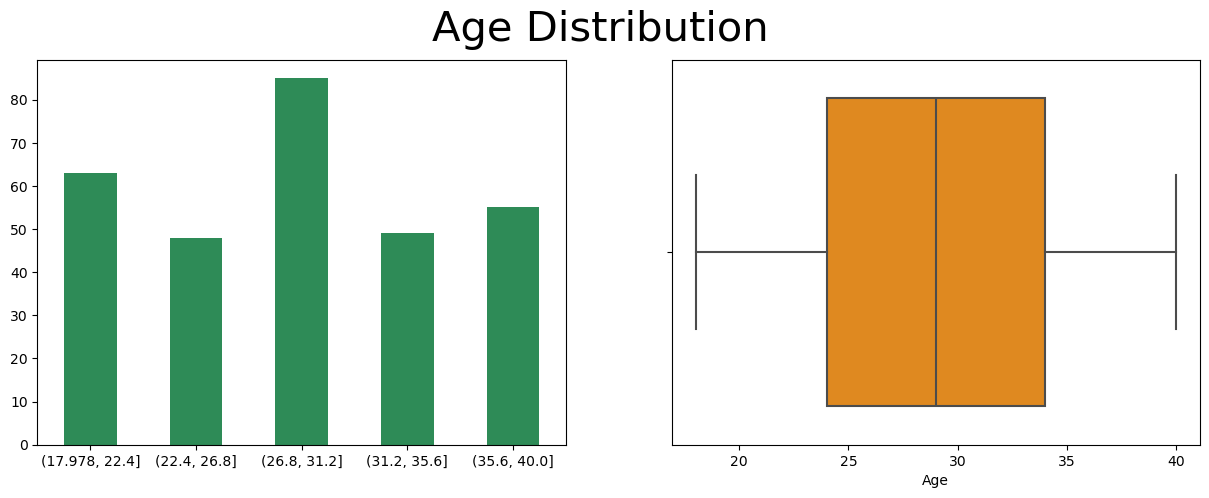

In [95]:
f, ax = plt.subplots(1,2, figsize=(15,5))
age_groups=pd.cut(user.Age,bins=5,)
vc=age_groups.value_counts()
vc=vc.sort_index()
vc.plot.bar(ax=ax[0],color='seagreen')
sns.boxplot(x=user.Age,ax=ax[1],color='darkorange')
ax[0].set_xticklabels(labels=vc.index,rotation=0,)
plt.suptitle("Age Distribution",size=30)
plt.show()

In [96]:
user['city'] = user.Location.apply(lambda x: x.split(",")[0] if isinstance(x, str) else None)

### What are the places from where most of the users(tourists) are coming from?

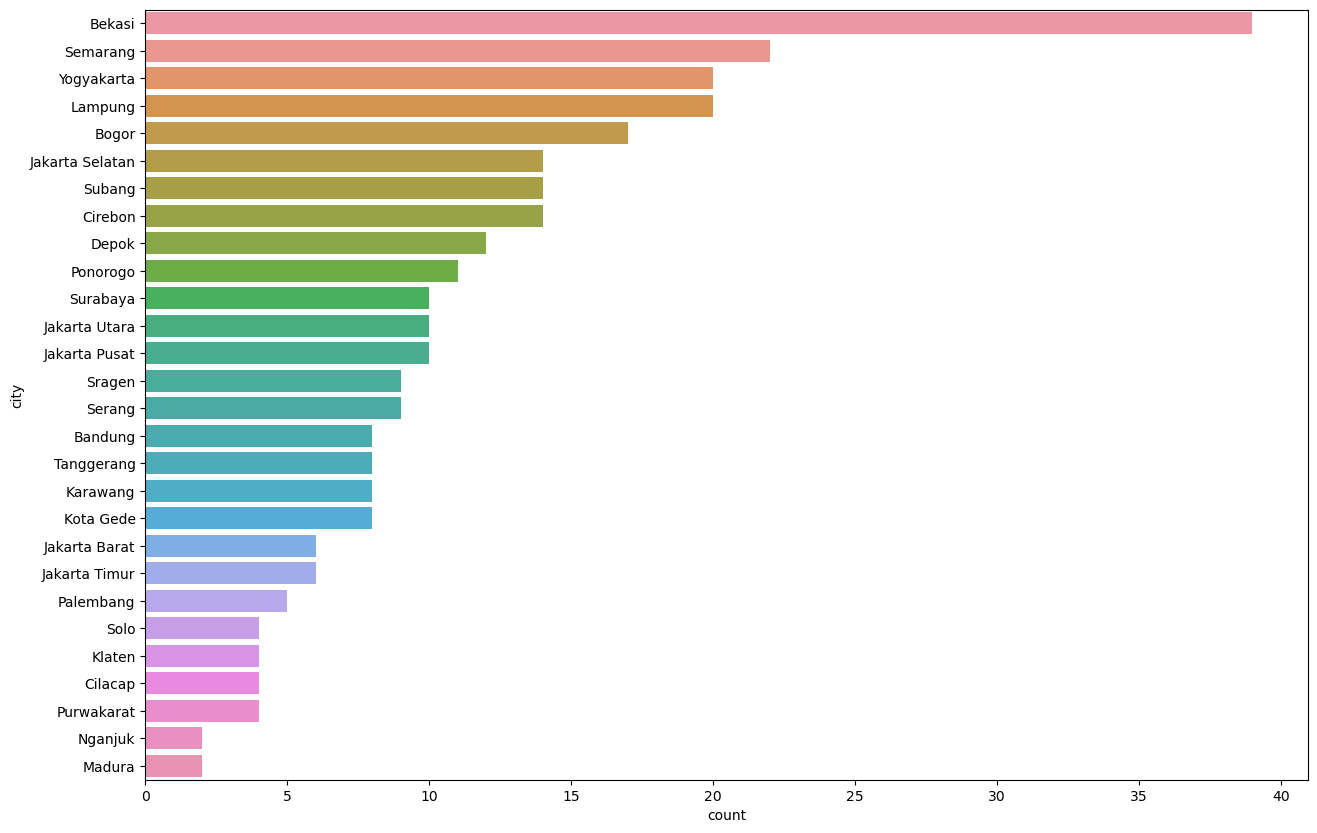

In [97]:
vc=user.city.value_counts()
plt.figure(figsize=(15,10))
sns.countplot(y="city",data=user,order=vc.index)
plt.show()

### Next let's explore the locations and categories of tourist spots

In [98]:
tourism_with_id.columns

Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'City', 'Price',
       'Rating', 'Time_Minutes', 'Coordinate', 'Lat', 'Long'],
      dtype='object')

In [99]:
tourism_with_id.Category = tourism_with_id.Category.str.strip().str.capitalize()

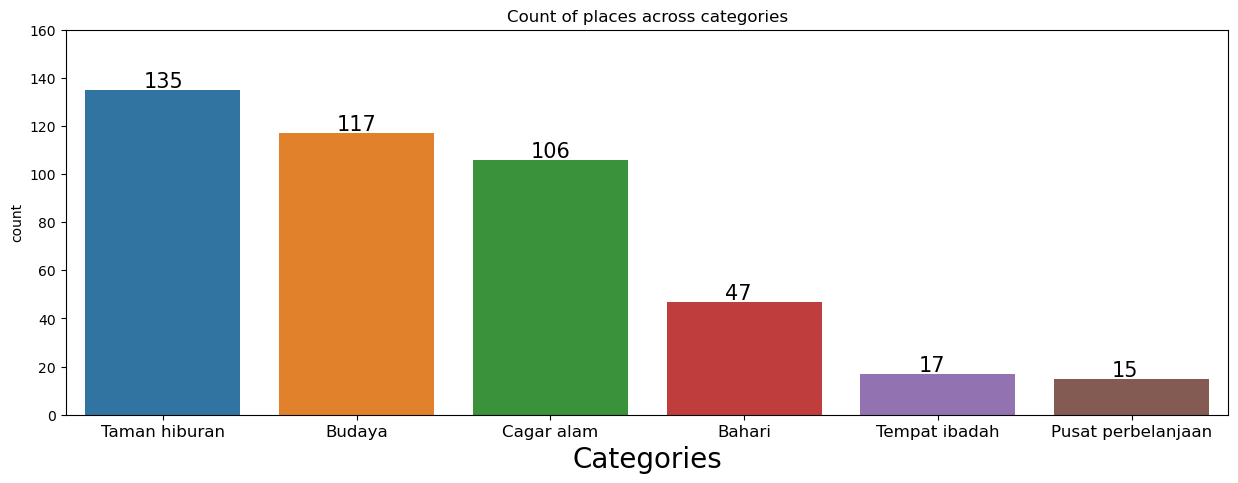

In [100]:
vc=tourism_with_id.Category.value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x=tourism_with_id.Category,order=vc.index)
i=0
for idx in range(len(vc.index)):
    plt.annotate(vc[idx],xy=(i-0.1,vc[idx]+1),size=15)
    i+=1
plt.xlabel('Categories',size=20)
plt.ylim(0,20*round(vc.max()/20)+20)
plt.xticks(size=12)
plt.title("Count of places across categories")
plt.show()

### What kind of tourism each city/location most famous or suitable for?

In [101]:
color = ["seagreen","slateblue","darkred","saddlebrown"]

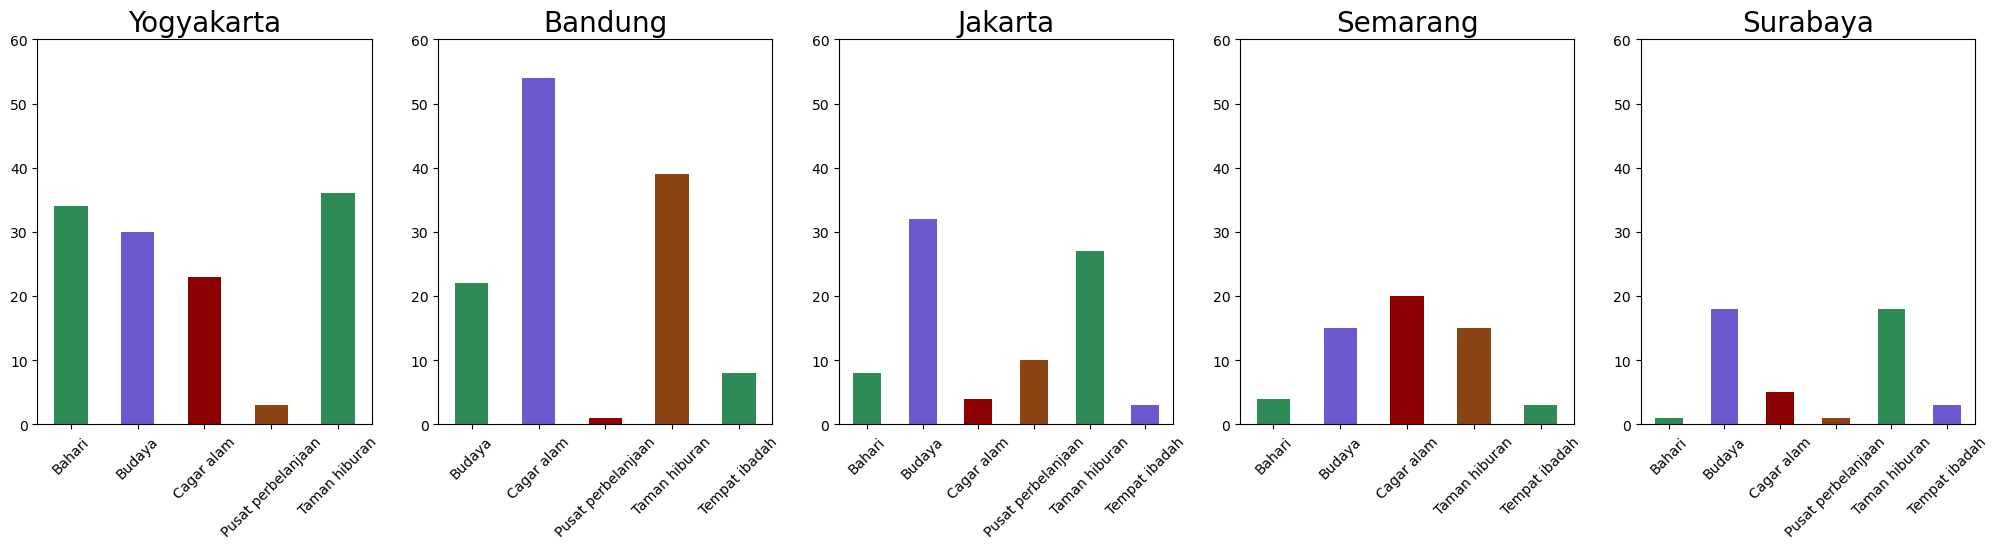

In [102]:
f, ax = plt.subplots(1,5, figsize=(25,5))
i=0
for c in tourism_with_id.City.value_counts().index:
    temp=tourism_with_id[tourism_with_id.City==c]
    vc=temp.Category.value_counts()
    vc=vc.sort_index()
    vc.plot.bar(stacked=True,ax=ax[i],color=color)
    ax[i].set_ylabel("")
    ax[i].set_ylim(0,60)
    ax[i].set_title(c,size=20)
    ax[i].set_xticklabels(labels=vc.index,rotation=45)
    i+=1


### Which city would be best for nature enthusiast to visit

In [103]:
tourism_with_id.Category.unique()

array(['Budaya', 'Taman hiburan', 'Cagar alam', 'Bahari',
       'Pusat perbelanjaan', 'Tempat ibadah'], dtype=object)

In [104]:
# Filter and count occurrences
vc = tourism_with_id[tourism_with_id.Category == "Nature"].City.value_counts()

# Plot pie chart
if not vc.empty:
    vc.plot.pie(radius=1.2, cmap="Set2", autopct="%1.2f%%")
    plt.ylabel("")  # Optionally omit y-axis label since it's redundant for a pie plot
    plt.title("Nature Preserve Distribution by City")
    plt.show()
else:
    print("No data available for the specified category 'Nature preserve'.")

No data available for the specified category 'Nature preserve'.


### To better understand tourism we need to create a combined data with places and their ratings

In [105]:
tourism_rating.head(2)

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2


In [106]:
tourism_with_id.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


### Calculate weighted avg. ratings for each place

In [107]:
# Assuming tourism_rating is already defined and is a DataFrame
ratings = tourism_rating.groupby("Place_Id")[["Place_Ratings"]].mean().round(2).reset_index()

# Now `ratings` is expected to be a DataFrame after the operations
print(ratings.head(2))  # Display the first 2 rows of the DataFrame

   Place_Id  Place_Ratings
0         1           3.72
1         2           2.84


In [108]:
place_ratings = pd.merge(tourism_with_id,ratings,on='Place_Id',how="left")
place_ratings.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Place_Ratings
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,3.72
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,2.84


### Use this data to figure out the spots that are most loved by the tourists

In [109]:
place_ratings.sort_values("Place_Ratings",ascending=False)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Place_Ratings
415,416,Keraton Surabaya,Kawasan yang berjuluk Kampung Keraton ini terd...,Budaya,Surabaya,0,4.4,NaN,"{'lat': -7.256755299999998, 'lng': 112.7942203}",-7.256755,112.794220,3.97
138,139,Puncak Gunung Api Purba - Nglanggeran,Gunung Nglanggeran adalah sebuah gunung di Dae...,Cagar alam,Yogyakarta,10000,4.7,60.0,"{'lat': -7.841252999999998, 'lng': 110.543056}",-7.841253,110.543056,3.88
51,52,Kampung Cina,KAMPUNG China adalah hunian dan kawasan perdag...,Budaya,Jakarta,15000,4.5,NaN,"{'lat': -6.3651357, 'lng': 106.7617984}",-6.365136,106.761798,3.84
253,254,Teras Cikapundung BBWS,Teras Cikapundung Bandung sebelumnya merupakan...,Taman hiburan,Bandung,0,4.3,60.0,"{'lat': -6.8844199, 'lng': 107.6068344}",-6.884420,107.606834,3.79
321,322,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar alam,Bandung,0,4.2,NaN,"{'lat': -7.195110199999998, 'lng': 107.4312811}",-7.195110,107.431281,3.77
...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Museum Perangko,Museum perangko dibangun dengan bentuk banguna...,Budaya,Jakarta,5000,4.4,NaN,"{'lat': -6.304184100000001, 'lng': 106.9017725}",-6.304184,106.901773,2.24
233,234,Amazing Art World,"Amazing Art World Bandung, sebuah objek wisata...",Budaya,Bandung,75000,4.5,45.0,"{'lat': -6.8516591, 'lng': 107.5955534}",-6.851659,107.595553,2.22
208,209,Pantai Sanglen,Pantai Sanglen. Lokasinya berada di Desa Kemad...,Bahari,Yogyakarta,10000,4.5,NaN,"{'lat': -8.1367456, 'lng': 110.5716362}",-8.136746,110.571636,2.21
103,104,Tebing Breksi,Tebing Breksi merupakan tempat wisata yang ber...,Budaya,Yogyakarta,20000,4.4,NaN,"{'lat': -7.781571400000001, 'lng': 110.5045827}",-7.781571,110.504583,2.17


### Which city has most loved tourist places
#### Picking up the places with avg rating above 3.5 as most loved places and finding the cities where most of these highly rated
#### spots are present

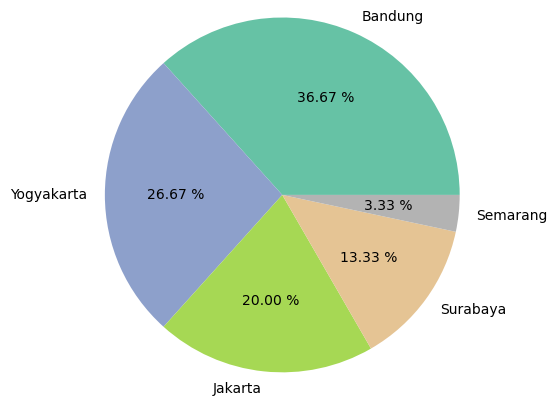

In [110]:
vc=place_ratings[place_ratings.Place_Ratings>3.5].City.value_counts()
vc.plot.pie(radius=1.2,cmap="Set2",autopct="%1.2f %%")
plt.ylabel("")
plt.show()

### Indonesia provides a wide range of tourist spots ranging from historical and cultural beauties to advanced amusement parks
### What category of places are users liking the most among these?
#### Again picking up the places with avg rating above 3.5 and finding out which are most liked categories
#### Most people liking the amusement parks very closely followed by the nature preserve

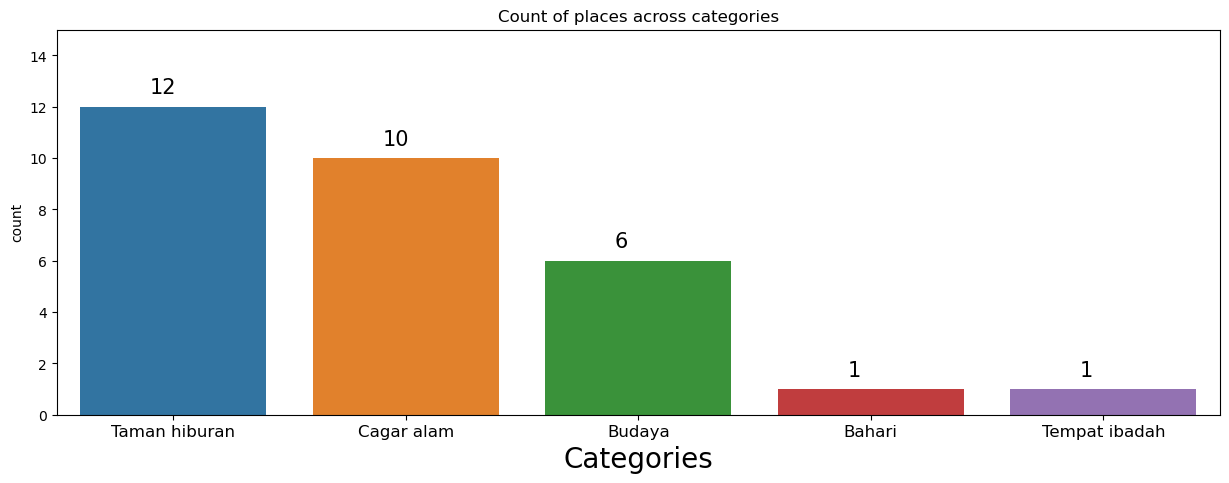

In [111]:
vc=place_ratings[place_ratings.Place_Ratings>3.5].Category.value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x="Category",data=place_ratings[place_ratings.Place_Ratings>3.5], order=vc.index)
i=0
for idx in vc.index:
    plt.annotate(vc[idx],xy=(i-0.1,vc[idx]+0.5),size=15)
    i+=1
    plt.xlabel('Categories',size=20)
    plt.ylim(0,15)
    plt.xticks(size=12)
    plt.title("Count of places across categories")
    
    

### Build a recommendation model for toursits
##### Create a Dataframe with information about these spots to include placeid, user rating, name, description, category, location and price
##### Use the above data to develop a content based filtering model for recommendation and use that to recommend other places to visit using
##### current tourist location (place name)

In [113]:
recom_data = tourism_rating.merge(tourism_with_id[["Place_Id","Place_Name","City"]],on="Place_Id",how="left")
recom_data.head(2)

,User_Id,Place_Id,Place_Ratings,Place_Name,City
0,1,179,3,Candi Ratu Boko,Yogyakarta
1,1,344,2,Pantai Marina,Semarang


In [115]:
ratings_data = recom_data.groupby(["User_Id","Place_Name"])["Place_Ratings"].mean().unstack()
ratings_data

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
297,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalize user-item matrix

In [116]:
data_norm=ratings_data.subtract(ratings_data.mean(axis=1), axis="rows")
data_norm.head()

Place_Name,Air Mancur Menari,Air Terjun Kali Pancur,Air Terjun Kedung Pedut,Air Terjun Semirang,Air Terjun Sri Gethuk,Alive Museum Ancol,Alun Alun Selatan Yogyakarta,Alun-Alun Kota Bandung,Alun-alun Utara Keraton Yogyakarta,Amazing Art World,...,Wisata Alam Wana Wisata Penggaron,Wisata Batu Kuda,Wisata Eling Bening,Wisata Kaliurang,Wisata Kampung Krisan Clapar,Wisata Kraton Jogja,Wisata Kuliner Pecenongan,Wisata Lereng Kelir,Wisata Mangrove Tapak,Wot Batu
User_Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.166667,NaN,NaN,NaN,NaN,-1.166667,NaN,-0.166667
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.344828,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### User similarity matrix using Pearson correlation

In [117]:
user_similarity = data_norm.T.corr()
user_similarity.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_Id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,NaN,0.981981,NaN,NaN,NaN,1.000000,-1.000000,0.188982,...,NaN,NaN,NaN,-0.192450,NaN,NaN,NaN,-1.000000,-0.379980,NaN
2,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,-1.0,-0.188982,NaN,-1.000000,-1.0,-0.5,-0.164771,-1.000000,0.577350,NaN
3,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,1.000000,-0.654654,NaN,...,NaN,1.000000,NaN,-0.388889,-1.0,NaN,1.000000,1.000000,NaN,NaN
4,0.981981,NaN,NaN,1.000000,NaN,-9.819805e-01,0.333333,1.000000,-1.000000,NaN,...,-1.0,-1.000000,NaN,-1.000000,-1.0,1.0,-1.000000,NaN,0.944911,NaN
5,NaN,NaN,NaN,NaN,1.0,-5.551115e-17,NaN,0.191741,-1.000000,1.000000,...,1.0,NaN,-1.0,-0.320750,-1.0,NaN,NaN,0.760726,NaN,-1.0


In [118]:
# Similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity_cosine = cosine_similarity(data_norm.fillna(0))
user_similarity_cosine

array([[ 1.        ,  0.03595249,  0.05315137, ..., -0.03342215,
        -0.07420851, -0.01770365],
       [ 0.03595249,  1.        , -0.04806466, ..., -0.01931211,
         0.08701855,  0.03947492],
       [ 0.05315137, -0.04806466,  1.        , ..., -0.02313585,
         0.01083189, -0.05956819],
       ...,
       [-0.03342215, -0.01931211, -0.02313585, ...,  1.        ,
         0.01781543,  0.01973164],
       [-0.07420851,  0.08701855,  0.01083189, ...,  0.01781543,
         1.        , -0.06031953],
       [-0.01770365,  0.03947492, -0.05956819, ...,  0.01973164,
        -0.06031953,  1.        ]])

In [119]:
# Pick a userid
picked_userid=1
# Remove picked userid from candidate list
user_similarity.drop(index=picked_userid,inplace=True)
# Take a look at the data
user_similarity.head()

User_Id,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
User_Id,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,-1.0,-0.188982,NaN,-1.000000,-1.0,-0.5,-0.164771,-1.000000,0.577350,NaN
3,NaN,-1.0,1.0,NaN,NaN,NaN,NaN,1.000000,-0.654654,NaN,...,NaN,1.000000,NaN,-0.388889,-1.0,NaN,1.000000,1.000000,NaN,NaN
4,0.981981,NaN,NaN,1.000000,NaN,-9.819805e-01,0.333333,1.000000,-1.000000,NaN,...,-1.0,-1.000000,NaN,-1.000000,-1.0,1.0,-1.000000,NaN,0.944911,NaN
5,NaN,NaN,NaN,NaN,1.000000e+00,-5.551115e-17,NaN,0.191741,-1.000000,1.0,...,1.0,NaN,-1.0,-0.320750,-1.0,NaN,NaN,0.760726,NaN,-1.0
6,NaN,NaN,NaN,-0.981981,-5.551115e-17,1.000000e+00,0.000000,-1.000000,NaN,NaN,...,0.5,0.987829,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [121]:
# Number of similar users
n=10
# User similarity threshold
user_similarity_threshold=0.3
# Get top n similar users
similar_users=user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid]
# Print out top n similar users
print(f'The similar users for user {picked_userid} are',similar_users)

The similar users for user 1 are User_Id
4      0.981981
8      1.000000
13     1.000000
14     0.500000
16     0.866025
         ...   
267    0.755929
281    0.462910
282    1.000000
283    0.477396
286    1.000000
Name: 1, Length: 72, dtype: float64


In [122]:
# Places that the target user has visited and rated
picked_userid_rated = data_norm[data_norm.index==picked_userid].dropna(axis=1,how='all')
picked_userid_rated.T

User_Id,1
Place_Name,
Atlantis Water Adventure,1.586207
Candi Ratu Boko,-0.413793
Curug Anom,-0.413793
Curug Tilu Leuwi Opat,0.586207
De Mata Museum Jogja,-0.413793
Grand Maerakaca,0.586207
Gua Pawon,-1.413793
Kampung Wisata Sosro Menduran,0.586207
Margasatwa Muara Angke,0.586207
